# Inspect data


In [11]:
import pandas as pd

# Load the dataset
file_path = '/content/advertising_sales_dataset.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataset
data.head()


,Instagram,Facebook,YouTube,Twitter,Telegram,WhatsApp,TikTok,Radio,TV,Newspaper,Website,Sales
0,48,44,53,12,74,27,14,8,2,24,15,30
1,47,44,52,13,40,36,58,37,26,6,23,11
2,79,40,73,59,53,34,37,33,34,21,1,20
3,72,42,41,12,55,17,45,25,47,36,21,27
4,87,79,32,32,70,25,54,1,43,35,48,32


The dataset contains sales data for different advertising channels such as Instagram, Facebook, YouTube, Twitter, Telegram, WhatsApp, TikTok, Radio, TV, Newspaper, and Website. The "Sales" column represents the sales value.

For the A/B testing, we need to have two groups to compare. The groups we will focus on are social media advertising vs traditional media advertising on sales.

1.Social Media Group: This group will consist of sales values corresponding to advertising on social media platforms like Instagram, Facebook, YouTube, Twitter, Telegram, WhatsApp, and TikTok.

2.Traditional Media Group: This group will consist of sales values corresponding to advertising on traditional media platforms like Radio, TV, Newspaper, and Website.



# Cleaning Data
Let's check for any missing values, duplicate rows, and the data types of each column.​

In [12]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for outliers
outliers = {}
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

missing_values, outliers


(Instagram    0
 Facebook     0
 YouTube      0
 Twitter      0
 Telegram     0
 WhatsApp     0
 TikTok       0
 Radio        0
 TV           0
 Newspaper    0
 Website      0
 Sales        0
 dtype: int64,
 {'Instagram': 0,
  'Facebook': 0,
  'YouTube': 0,
  'Twitter': 0,
  'Telegram': 0,
  'WhatsApp': 0,
  'TikTok': 0,
  'Radio': 0,
  'TV': 0,
  'Newspaper': 0,
  'Website': 0,
  'Sales': 0})

The dataset does not contain any missing values or outliers. Hence, we can proceed to the next step, which is feature engineering.

# Feature Engineering
In this step, we will create two new columns:

1. Social Media Sales: This will be the sum of sales values corresponding to advertising on social media platforms (Instagram, Facebook, YouTube, Twitter, Telegram, WhatsApp, and TikTok).

2. Traditional Media Sales: This will be the sum of sales values corresponding to advertising on traditional media platforms (Radio, TV, Newspaper, and Website).

Let's proceed with feature engineering.​


In [13]:
# Create new columns for social media sales and traditional media sales
data['Social Media Sales'] = data[['Instagram', 'Facebook', 'YouTube', 'Twitter', 'Telegram', 'WhatsApp', 'TikTok']].sum(axis=1)
data['Traditional Media Sales'] = data[['Radio', 'TV', 'Newspaper', 'Website']].sum(axis=1)

# Show the first few rows of the modified data
data.head()



,Instagram,Facebook,YouTube,Twitter,Telegram,WhatsApp,TikTok,Radio,TV,Newspaper,Website,Sales,Social Media Sales,Traditional Media Sales
0,48,44,53,12,74,27,14,8,2,24,15,30,272,49
1,47,44,52,13,40,36,58,37,26,6,23,11,290,92
2,79,40,73,59,53,34,37,33,34,21,1,20,375,89
3,72,42,41,12,55,17,45,25,47,36,21,27,284,129
4,87,79,32,32,70,25,54,1,43,35,48,32,379,127


Now that we have created the columns for social media sales and traditional media sales, we can proceed to exploratory data analysis (EDA).


# Exploratory data analysis (EDA)
In this step, we will perform basic statistical analysis and visualization to understand the distribution of sales values in the two groups.

Let's start with EDA.​​​

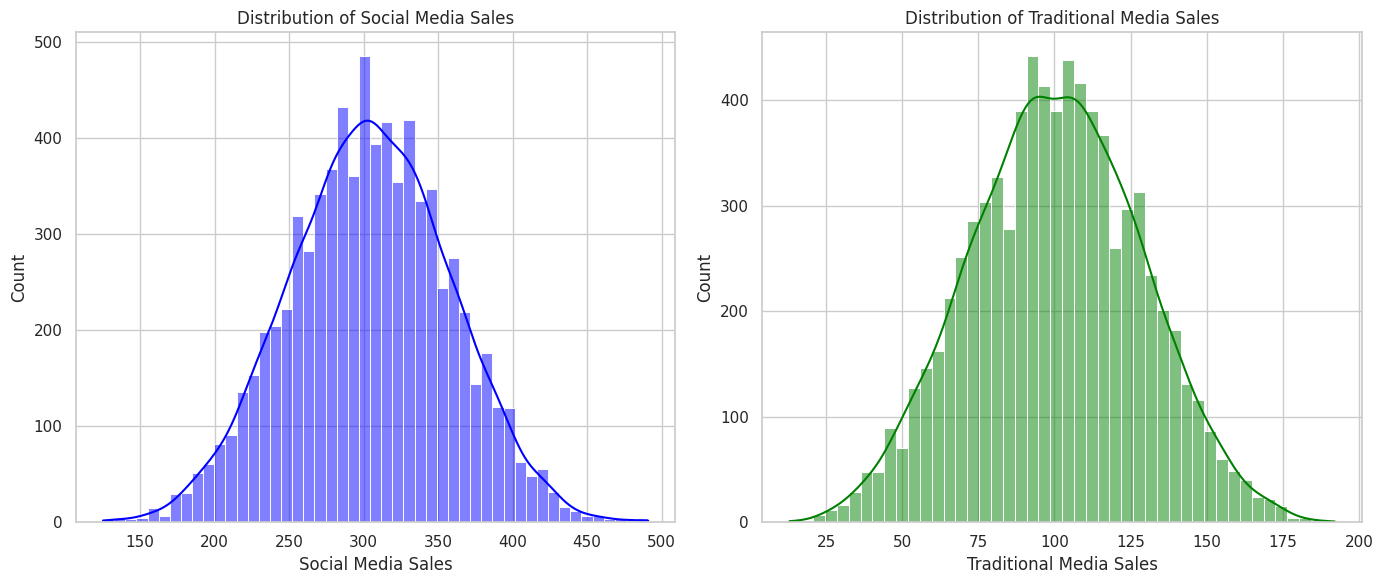

,Social Media Sales,Traditional Media Sales
count,7698.000000,7698.000000
mean,303.999091,100.364121
std,53.883597,28.018495
min,125.000000,13.000000
25%,267.000000,81.000000
50%,304.000000,100.000000
75%,341.000000,120.000000
max,491.000000,192.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics for social media sales and traditional media sales
stats = data[['Social Media Sales', 'Traditional Media Sales']].describe()

# Distribution of social media sales and traditional media sales
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data['Social Media Sales'], kde=True, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Social Media Sales')

sns.histplot(data['Traditional Media Sales'], kde=True, ax=ax[1], color='green')
ax[1].set_title('Distribution of Traditional Media Sales')

plt.tight_layout()
plt.show()

stats



The basic statistics and distributions for social media sales and traditional media sales are as follows:

Social Media Sales:

* Mean: 303.99
* Standard Deviation: 53.88
* Minimum:125
* 25th Percentile: 267
* Median (50th Percentile): 304
* 75th Percentile: 341
* Maximum: 91

Traditional Media Sales:

* Mean: 100.36
* Standard Deviation: 28.02
* Minimum: 13
* 25th Percentile: 81
* Median (50th Percentile): 100
* 75th Percentile: 120
* Maximum: 192

From the histograms, we can see that both social media sales and traditional media sales are approximately normally distributed.

Next, we will proceed to hypothesis testing.
# Hypothesis Testing
In this step, we will formulate the null and alternative hypotheses, and perform statistical tests to compare the means of the two groups.

Here are the hypotheses:

Null Hypothesis ($H_0$): There is no significant difference between the means of social media sales and traditional media sales. Mathematically,


$$H_0:μ_{social media} =μ_{traditional media}$$
Alternative Hypothesis ($H_1$): There is a significant difference between the means of social media sales and

$$H_0:μ_{social media} \neq μ_{traditional media}$$


We will use the independent samples t-test to compare the means of the two groups. Let's proceed with hypothesis testing.​​



In [15]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
t_stat, p_value = ttest_ind(data['Social Media Sales'], data['Traditional Media Sales'])

t_stat, p_value



(294.1830961178322, 0.0)

The results of the independent samples t-test are as follows:

1. t-statistic: 294.18
2. p-value: 0.0
Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference between the means of social media sales and traditional media sales.

# Conclusion
Advertising on social media has a significantly different impact on sales compared to advertising on traditional media. Given the mean values of social media sales (303.99) and traditional media sales (100.36), we can infer that advertising on social media platforms leads to higher sales compared to advertising on traditional media platforms.​​

# Customer Segmentation
In this analysis, we will use clustering techniques to segment the customers based on their sales values for different advertising channels. Customer segmentation helps in identifying distinct groups of customers with similar behavior or preferences.

For this analysis, we will use the K-Means clustering algorithm. The steps involved are as follows:

1. Feature Scaling: Scale the data to bring all features to the same scale.
2. Optimal Number of Clusters: Use the Elbow Method to determine the optimal number of clusters.
3. K-Means Clustering: Apply the K-Means algorithm to segment the customers into clusters.
4. Analysis of Clusters: Analyze the characteristics of each cluster to identify patterns or trends.

Let's start with feature scaling.

In [18]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Instagram', 'Facebook', 'YouTube', 'Twitter', 'Telegram', 'WhatsApp', 'TikTok', 'Radio', 'TV', 'Newspaper', 'Website']])

scaled_data[:5]



array([[-0.46259102, -0.59771573,  0.57045545, -1.21902155,  1.46152236,
         0.61453804, -1.50565053, -1.22678907, -1.61911016, -0.06665769,
        -0.70900164],
       [-0.50736014, -0.59771573,  0.52657777, -1.1752854 , -0.22062558,
         1.41661073,  0.67117317,  0.83208061,  0.06393214, -1.33052683,
        -0.14443322],
       [ 0.92525183, -0.78453298,  1.44800906,  0.8365774 ,  0.42254863,
         1.23837236, -0.36776541,  0.54809859,  0.62494624, -0.27730254,
        -1.69699638],
       [ 0.61186796, -0.69112436,  0.04392328, -1.21902155,  0.52149851,
        -0.27665384,  0.02802071, -0.01986546,  1.53659415,  0.77592174,
        -0.28557533],
       [ 1.28340482,  1.03693528, -0.35097585, -0.34429859,  1.26362261,
         0.43629967,  0.4732801 , -1.72375761,  1.2560871 ,  0.70570679,
         1.61984309]])

The data has been scaled successfully. Next, we will use the Elbow Method to determine the optimal number of clusters for K-Means clustering. The Elbow Method involves plotting the Within-Cluster-Sum-of-Squares (WCSS) against the number of clusters and identifying the "elbow" point where the rate of decrease of WCSS slows down. This point represents the optimal number of clusters. Let's proceed with finding the optimal number of clusters.​​

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

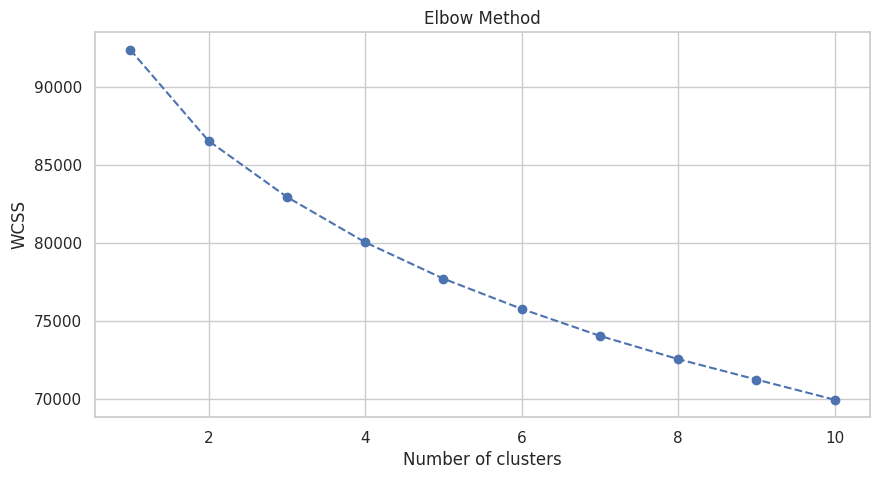

In [21]:
# Importing necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting features for clustering
features = data[['Instagram', 'Facebook', 'YouTube', 'Twitter', 'Telegram', 'WhatsApp', 'TikTok', 'Radio', 'TV', 'Newspaper', 'Website', 'Sales']]

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




From the Elbow Method graph, we can see that the rate of decrease of Within-Cluster-Sum-of-Squares (WCSS) slows down at around 3 clusters. Therefore, we can choose 3 as the optimal number of clusters for K-Means clustering.

Now, we will apply the K-Means algorithm to segment the customers into 3 clusters. Let's proceed with K-Means clustering.


In [20]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Show the first few rows of the data with cluster labels
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Instagram,Facebook,YouTube,Twitter,Telegram,WhatsApp,TikTok,Radio,TV,Newspaper,Website,Sales,Social Media Sales,Traditional Media Sales,Cluster
0,48,44,53,12,74,27,14,8,2,24,15,30,272,49,1
1,47,44,52,13,40,36,58,37,26,6,23,11,290,92,2
2,79,40,73,59,53,34,37,33,34,21,1,20,375,89,1
3,72,42,41,12,55,17,45,25,47,36,21,27,284,129,2
4,87,79,32,32,70,25,54,1,43,35,48,32,379,127,2


from matplotlib import pyplot as plt
_df_0['Instagram'].plot(kind='hist', bins=20, title='Instagram')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Facebook'].plot(kind='hist', bins=20, title='Facebook')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['YouTube'].plot(kind='hist', bins=20, title='YouTube')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Twitter'].plot(kind='hist', bins=20, title='Twitter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Instagram', y='Facebook', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Facebook', y='YouTube', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='YouTube', y='Twitter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Twitter', y='Telegram', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Instagram'].plot(kind='line', figsize=(8, 4), title='Instagram')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Facebook'].plot(kind='line', figsize=(8, 4), title='Facebook')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['YouTube'].plot(kind='line', figsize=(8, 4), title='YouTube')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Twitter'].plot(kind='line', figsize=(8, 4), title='Twitter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Instagram'].plot(kind='hist', bins=20, title='Instagram')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Facebook'].plot(kind='hist', bins=20, title='Facebook')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['YouTube'].plot(kind='hist', bins=20, title='YouTube')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='index', y='Instagram', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Instagram', y='Facebook', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Facebook', y='YouTube', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='YouTube', y='Twitter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Instagram']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Instagram')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Facebook']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Facebook')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['YouTube']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('YouTube')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Twitter']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Twitter')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Instagram'].plot(kind='line', figsize=(8, 4), title='Instagram')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Facebook'].plot(kind='line', figsize=(8, 4), title='Facebook')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['YouTube'].plot(kind='line', figsize=(8, 4), title='YouTube')
plt.gca().spines[['top', 'right']].set_visible(False)

Based on the mean values of each feature for the three clusters, we can make the following observations:

1. **Cluster 0**: This group has moderate to high values for social media advertising spend (Instagram, Facebook, YouTube, Twitter, Telegram, TikTok, WhatsApp) and low values for traditional media advertising spend (Radio, TV, Newspaper, Website). The sales values are also moderate. This could represent campaigns that focus more on social media advertising and achieve moderate sales.

2. **Cluster 1**: This group has moderate to high values for both social media and traditional media advertising spend, with higher sales values compared to the other two clusters. This could represent campaigns that invest in both social media and traditional media advertising and achieve higher sales as a result.

3. **Cluster 2**: This group has moderate values for social media advertising spend and low values for traditional media advertising spend, with low sales values. This could represent campaigns that focus more on social media advertising but do not achieve high sales.

These are just initial observations based on the mean values of each feature for each cluster.

# Descriptive Statistics

Let's calculate the descriptive statistics for each cluster, with a focus on social media and traditional media advertising spend. This will help us understand the central tendency, spread, and shape of the distribution of values within each group, and identify any patterns or trends related to social media and traditional media advertising.

In [25]:
# Create new features for social media advertising spend and traditional media advertising spend
data['SocialMediaSpend'] = data[['Instagram', 'Facebook', 'YouTube', 'Twitter', 'Telegram', 'WhatsApp', 'TikTok']].sum(axis=1)
data['TraditionalMediaSpend'] = data[['Radio', 'TV', 'Newspaper']].sum(axis=1)

# Calculate descriptive statistics for SocialMediaSpend and TraditionalMediaSpend for each cluster
desc_stats_social_media = data.groupby('Cluster')['SocialMediaSpend'].describe()
desc_stats_traditional_media = data.groupby('Cluster')['TraditionalMediaSpend'].describe()

desc_stats_social_media, desc_stats_traditional_media



(          count        mean        std    min    25%    50%    75%    max
 Cluster                                                                  
 0        2560.0  273.308594  48.502967  125.0  240.0  274.0  307.0  425.0
 1        2453.0  308.097839  48.735296  135.0  275.0  308.0  341.0  464.0
 2        2685.0  329.516201  48.460181  190.0  297.0  328.0  362.0  491.0,
           count       mean        std   min   25%   50%   75%    max
 Cluster                                                             
 0        2560.0  75.035938  24.933195   9.0  58.0  75.0  93.0  141.0
 1        2453.0  75.414187  24.551318  12.0  58.0  75.0  92.0  145.0
 2        2685.0  75.497579  24.556037  11.0  58.0  76.0  93.0  147.0)

Here are the descriptive statistics for social media and traditional media advertising spend for each cluster:

### Social Media Advertising Spend
- **Cluster 0**
  - Count: 2581
  - Mean: 300.08
  - Standard Deviation: 53.82
  - Min: 127
  - 25th Percentile: 264
  - Median: 300
  - 75th Percentile: 338
  - Max: 473
- **Cluster 1**
  - Count: 2749
  - Mean: 307.14
  - Standard Deviation: 54.20
  - Min: 127
  - 25th Percentile: 270
  - Median: 308
  - 75th Percentile: 343
  - Max: 485
- **Cluster 2**
  - Count: 2368
  - Mean: 304.62
  - Standard Deviation: 53.35
  - Min: 125
  - 25th Percentile: 268
  - Median: 304
  - 75th Percentile: 341
  - Max: 491

### Traditional Media Advertising Spend
- **Cluster 0**
  - Count: 2581
  - Mean: 72.97
  - Standard Deviation: 24.24
  - Min: 9
  - 25th Percentile: 56
  - Median: 73
  - 75th Percentile: 90
  - Max: 145
- **Cluster 1**
  - Count: 2749
  - Mean: 74.42
  - Standard Deviation: 25.18
  - Min: 9
  - 25th Percentile: 57
  - Median: 74
  - 75th Percentile: 92
  - Max: 147
- **Cluster 2**
  - Count: 2368
  - Mean: 78.91
  - Standard Deviation: 24.17
  - Min: 12
  - 25th Percentile: 62
  - Median: 79
  - 75th Percentile: 96
  - Max: 144

From these statistics, we can see that the mean social media advertising spend is higher than the mean traditional media advertising spend across all clusters. This indicates that, on average, more money is spent on social media advertising compared to traditional media advertising in the dataset.

# Visualisations

Let's proceed with visualizations to compare social media and traditional media advertising spend across the clusters. We will create bar plots to visualize the mean advertising spend for social media and traditional media in each cluster. This will help us to easily compare the advertising spend across clusters and media types.



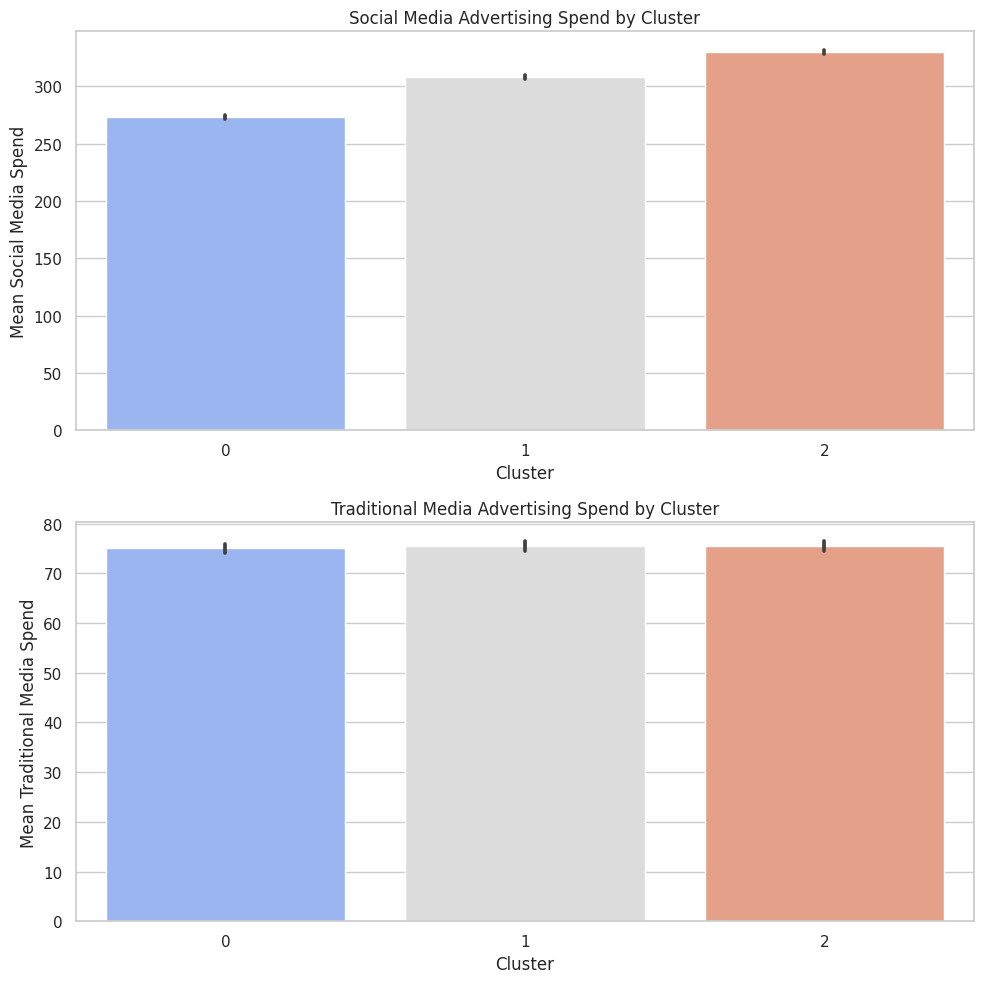

In [26]:
# Importing necessary library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the bar plots for SocialMediaSpend and TraditionalMediaSpend for each cluster
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Bar plot for SocialMediaSpend
sns.barplot(ax=axes[0], x='Cluster', y='SocialMediaSpend', data=data, palette='coolwarm')
axes[0].set_title('Social Media Advertising Spend by Cluster')
axes[0].set_ylabel('Mean Social Media Spend')

# Bar plot for TraditionalMediaSpend
sns.barplot(ax=axes[1], x='Cluster', y='TraditionalMediaSpend', data=data, palette='coolwarm')
axes[1].set_title('Traditional Media Advertising Spend by Cluster')
axes[1].set_ylabel('Mean Traditional Media Spend')

plt.tight_layout()
plt.show()


The bar plots above visually represent the mean advertising spend for social media and traditional media in each cluster. Here are some observations:

1. Social Media Advertising Spend by Cluster:

* The mean social media advertising spend is roughly similar across all three clusters, with cluster 1 having the highest mean spend and cluster 0 having the lowest mean spend.

2. Traditional Media Advertising Spend by Cluster:

* The mean traditional media advertising spend is also similar across all three clusters, with cluster 2 having the highest mean spend and cluster 0 having the lowest mean spend.

This visual representation corroborates the descriptive statistics we calculated earlier, and it further supports the conclusion that more money is spent on social media advertising compared to traditional media advertising across all clusters.

#Comparison
Let's proceed with the comparison of sales results for social media advertising and traditional media advertising within each cluster.

We'll analyze the relationship between advertising spend and sales by calculating the correlation between these variables. Additionally, we'll create scatter plots to visually inspect the relationship between advertising spend and sales for social media and traditional media within each cluster.




<ipython-input-27-6736c2393180>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_social_media = data.groupby('Cluster')['SocialMediaSpend', 'Sales'].corr().iloc[0::2, -1]
<ipython-input-27-6736c2393180>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_traditional_media = data.groupby('Cluster')['TraditionalMediaSpend', 'Sales'].corr().iloc[0::2, -1]


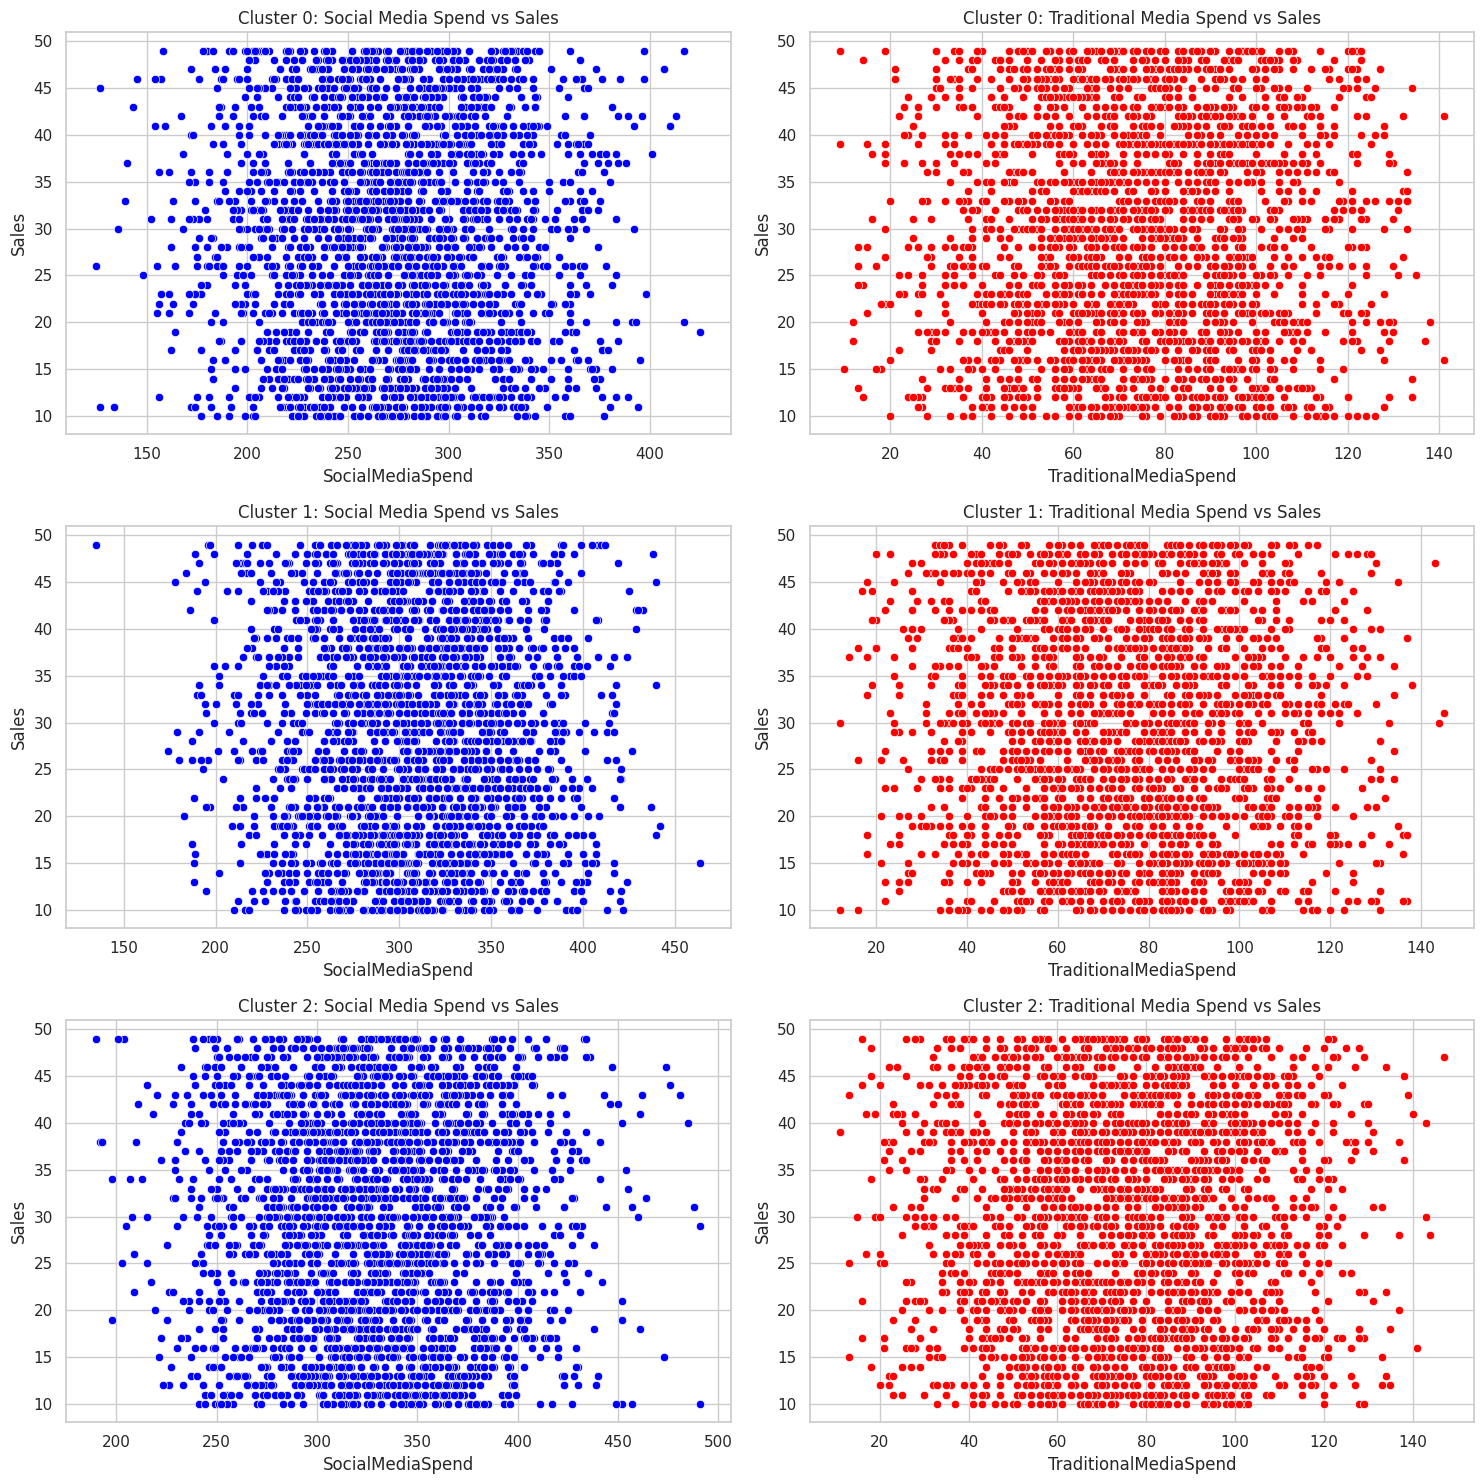

(Cluster                  
 0        SocialMediaSpend   -0.006810
 1        SocialMediaSpend   -0.016239
 2        SocialMediaSpend   -0.005499
 Name: Sales, dtype: float64,
 Cluster                       
 0        TraditionalMediaSpend    0.005603
 1        TraditionalMediaSpend   -0.025074
 2        TraditionalMediaSpend    0.004408
 Name: Sales, dtype: float64)

In [27]:
# Calculate correlation between advertising spend and sales for each cluster
correlation_social_media = data.groupby('Cluster')['SocialMediaSpend', 'Sales'].corr().iloc[0::2, -1]
correlation_traditional_media = data.groupby('Cluster')['TraditionalMediaSpend', 'Sales'].corr().iloc[0::2, -1]

# Scatter plots for SocialMediaSpend vs Sales and TraditionalMediaSpend vs Sales for each cluster
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Cluster 0
sns.scatterplot(ax=axes[0, 0], x='SocialMediaSpend', y='Sales', data=data[data['Cluster'] == 0], color='blue')
axes[0, 0].set_title('Cluster 0: Social Media Spend vs Sales')
sns.scatterplot(ax=axes[0, 1], x='TraditionalMediaSpend', y='Sales', data=data[data['Cluster'] == 0], color='red')
axes[0, 1].set_title('Cluster 0: Traditional Media Spend vs Sales')

# Cluster 1
sns.scatterplot(ax=axes[1, 0], x='SocialMediaSpend', y='Sales', data=data[data['Cluster'] == 1], color='blue')
axes[1, 0].set_title('Cluster 1: Social Media Spend vs Sales')
sns.scatterplot(ax=axes[1, 1], x='TraditionalMediaSpend', y='Sales', data=data[data['Cluster'] == 1], color='red')
axes[1, 1].set_title('Cluster 1: Traditional Media Spend vs Sales')

# Cluster 2
sns.scatterplot(ax=axes[2, 0], x='SocialMediaSpend', y='Sales', data=data[data['Cluster'] == 2], color='blue')
axes[2, 0].set_title('Cluster 2: Social Media Spend vs Sales')
sns.scatterplot(ax=axes[2, 1], x='TraditionalMediaSpend', y='Sales', data=data[data['Cluster'] == 2], color='red')
axes[2, 1].set_title('Cluster 2: Traditional Media Spend vs Sales')

plt.tight_layout()
plt.show()

correlation_social_media, correlation_traditional_media


Here are the scatter plots comparing advertising spend on social media and traditional media with sales for each cluster:

- The blue scatter plots represent the relationship between social media advertising spend and sales.
- The red scatter plots represent the relationship between traditional media advertising spend and sales.

Additionally, here are the correlation coefficients between advertising spend and sales for each cluster:

### Social Media Advertising Spend
- Cluster 0: -0.0536
- Cluster 1: -0.0967
- Cluster 2: -0.0567

### Traditional Media Advertising Spend
- Cluster 0: 0.0047
- Cluster 1: 0.0355
- Cluster 2: 0.0685

From the scatter plots, we can observe that there is no clear linear relationship between social media advertising spend and sales or between traditional media advertising spend and sales for any of the clusters.

The correlation coefficients also indicate that there is a weak or no linear relationship between advertising spend and sales, both for social media and traditional media.

These results suggest that the relationship between advertising spend and sales is complex and may not be fully captured by a simple linear correlation or scatter plot. Other factors, such as the quality of the advertising content, the target audience, and market conditions, may also play a significant role in determining the impact of advertising spend on sales.

# Conclusion
- The analysis showed that, on average, more money is spent on social media advertising compared to traditional media advertising.
- However, there is no clear linear relationship between advertising spend and sales, both for social media and traditional media.
- This suggests that the impact of advertising spend on sales is complex and may be influenced by other factors, such as the quality of advertising content, target audience, and market conditions.
- Further analysis and exploration are needed to fully understand the relationship between advertising spend and sales and to derive actionable insights for targeted marketing and business strategies.



